In [2]:
import pandas as pd
import numpy as np

In [3]:
satellite_data_ERA5=pd.read_csv('/home/wolverine/ML/SIH-model/data/satellite/ERA5_timeseries_mandir_marg_station.csv')

In [4]:
satellite_data_ERA5

,system:index,time,total_cloud_cover,total_precipitation,.geo
0,20240101T00,2024-01-01 00:00,0.994810,-1.862645e-09,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,20240101T01,2024-01-01 01:00,1.000000,-9.313226e-10,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,20240101T02,2024-01-01 02:00,1.000000,0.000000e+00,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,20240101T03,2024-01-01 03:00,1.000000,0.000000e+00,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,20240101T04,2024-01-01 04:00,0.994810,0.000000e+00,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...,...
8779,20241231T19,2024-12-31 19:00,0.436395,2.469840e-06,"{""type"":""MultiPoint"",""coordinates"":[]}"
8780,20241231T20,2024-12-31 20:00,0.398909,1.365314e-06,"{""type"":""MultiPoint"",""coordinates"":[]}"
8781,20241231T21,2024-12-31 21:00,0.449386,2.058200e-06,"{""type"":""MultiPoint"",""coordinates"":[]}"
8782,20241231T22,2024-12-31 22:00,0.413628,1.776954e-06,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [5]:
station_hourly_data=pd.read_csv('/home/wolverine/ML/SIH-model/data/satellite/Raw_data_1Hr_2024_site_122_Mandir_Marg_Delhi_DPCC_1Hr.csv')

In [6]:
station_hourly_data


,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01 00:00:00,185.67,276.25,39.98,49.85,89.85,81.78,2.03,NaN,3.80,...,NaN,9.22,85.78,0.57,173.00,NaN,0.0,4.60,975.75,0.00
1,2024-01-01 01:00:00,168.75,244.75,40.30,48.30,88.62,81.78,1.60,NaN,3.70,...,NaN,9.17,86.05,0.32,276.58,NaN,0.0,8.70,975.88,0.00
2,2024-01-01 02:00:00,183.25,261.25,38.40,48.65,87.10,77.20,1.20,NaN,3.38,...,NaN,8.95,86.20,0.52,201.80,NaN,0.0,8.43,975.90,0.00
3,2024-01-01 03:00:00,176.00,251.25,39.52,47.95,87.50,77.72,1.23,NaN,3.40,...,NaN,9.00,86.30,0.35,230.23,NaN,0.0,8.45,975.68,0.00
4,2024-01-01 04:00:00,177.25,255.00,37.70,47.72,85.48,79.60,2.17,NaN,3.28,...,NaN,8.85,86.18,0.45,295.15,NaN,0.0,8.35,975.65,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31 19:00:00,193.00,245.00,8.85,80.25,49.88,57.62,4.42,1.82,24.80,...,NaN,11.05,88.75,0.30,258.75,NaN,0.0,3.00,986.00,-0.02
8780,2024-12-31 20:00:00,165.00,226.00,12.60,76.10,50.72,56.40,3.95,1.94,26.55,...,NaN,10.35,90.75,0.30,246.50,NaN,0.0,3.25,986.00,-0.02
8781,2024-12-31 21:00:00,181.00,222.00,20.80,76.18,57.48,56.85,0.50,2.09,29.55,...,NaN,9.90,91.75,0.30,258.75,NaN,0.0,4.25,986.00,-0.02
8782,2024-12-31 22:00:00,210.00,245.00,43.68,91.85,84.40,57.38,NaN,2.47,35.70,...,NaN,9.60,93.00,0.30,244.50,NaN,0.0,4.00,986.00,-0.02


In [7]:
station_hourly_data.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

In [8]:
station_hourly_data = station_hourly_data.replace(r'^\s*$', np.nan, regex=True).dropna(axis=1, how='all')

In [9]:
station_hourly_data.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

In [10]:
nancount=station_hourly_data['SR (W/mt2)'].isna().sum()
print(nancount)

1350


In [11]:
satellite_data_ERA5=pd.DataFrame(satellite_data_ERA5)

In [12]:
station_hourly_data_merged=station_hourly_data.join(satellite_data_ERA5)

In [13]:
station_hourly_data_merged.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'system:index', 'time',
       'total_cloud_cover', 'total_precipitation', '.geo'],
      dtype='object')

In [14]:
station_hourly_data_merged.drop(columns=['system:index','.geo','time','TOT-RF (mm)'], inplace=True)

In [15]:
station_hourly_data_merged['total_precipitation']=np.maximum(0,station_hourly_data_merged['total_precipitation'])

In [16]:
print(station_hourly_data_merged['total_precipitation'].sum())

0.9217772706974381


In [17]:
station_hourly_data_merged['u_comp_wind']=station_hourly_data_merged['WS (m/s)']*np.cos(np.radians(station_hourly_data_merged['WD (deg)']))
station_hourly_data_merged['v_comp_wind']=station_hourly_data_merged['WS (m/s)']*np.sin(np.radians(station_hourly_data_merged['WD (deg)']))

In [18]:
df=pd.DataFrame()

In [19]:
df['time']=pd.to_datetime(station_hourly_data_merged['Timestamp'])
df['date']=df['time'].dt.date

In [20]:
station_hourly_data_merged['hour']=df['time'].dt.hour
station_hourly_data_merged['day-of-week']=df['time'].dt.dayofweek
station_hourly_data_merged['day-of-year']=df['time'].dt.dayofyear
#week of the year not implemented
station_hourly_data_merged['month']=df['time'].dt.month
station_hourly_data_merged['quarter']=df['time'].dt.quarter
station_hourly_data_merged['is_weekend']=station_hourly_data_merged['day-of-week'].isin([5,6]).astype(int)


In [21]:
station_hourly_data_merged['dewpoint']=station_hourly_data_merged['AT (°C)'] - ((100 - station_hourly_data_merged['RH (%)']) / 5)

In [22]:
station_hourly_data_merged=station_hourly_data_merged.drop(columns=['Timestamp','RH (%)','WS (m/s)','WD (deg)'])



In [23]:
print(station_hourly_data_merged['total_precipitation'].sum())

0.9217772706974381


In [24]:
station_hourly_data_merged.columns

Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'AT (°C)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'total_cloud_cover',
       'total_precipitation', 'u_comp_wind', 'v_comp_wind', 'hour',
       'day-of-week', 'day-of-year', 'month', 'quarter', 'is_weekend',
       'dewpoint'],
      dtype='object')

In [25]:
station_hourly_data_merged.describe()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,total_precipitation,u_comp_wind,v_comp_wind,hour,day-of-week,day-of-year,month,quarter,is_weekend,dewpoint
count,7243.000000,7576.000000,7963.000000,7971.000000,7979.000000,7970.000000,7834.000000,7833.000000,7745.000000,2871.000000,...,8.777000e+03,7970.000000,7970.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,7936.000000
mean,102.977451,162.131072,42.983789,72.525274,74.131990,34.278167,7.503537,1.114269,23.013899,2.366343,...,1.050219e-04,-0.391266,-0.291291,11.500000,2.986339,183.500000,6.513661,2.505464,0.284153,19.145504
std,97.875791,116.381169,37.588658,30.480395,34.943331,18.879960,4.559708,0.705472,24.242888,1.919995,...,5.886901e-04,0.463287,0.923369,6.922581,2.003480,105.660719,3.451430,1.118084,0.451036,8.202851
min,1.000000,2.000000,0.550000,2.300000,0.000000,8.500000,0.300000,0.000000,0.200000,0.000000,...,0.000000e+00,-3.169830,-3.989236,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-0.370000
25%,35.000000,81.000000,15.765000,46.690000,48.490000,20.057500,5.230000,0.660000,7.400000,1.100000,...,0.000000e+00,-0.685252,-0.636914,5.750000,1.000000,92.000000,4.000000,2.000000,0.000000,12.642500
50%,67.250000,130.000000,33.780000,69.850000,71.380000,28.235000,7.000000,0.940000,14.600000,1.880000,...,0.000000e+00,-0.287271,-0.281457,11.500000,3.000000,183.500000,7.000000,3.000000,0.000000,20.900000
75%,147.000000,217.000000,59.810000,93.790000,89.480000,43.015000,9.170000,1.400000,30.200000,3.090000,...,1.396427e-07,-0.040126,0.035261,17.250000,5.000000,275.000000,10.000000,4.000000,1.000000,26.400000
max,996.000000,979.000000,358.020000,187.320000,352.400000,104.100000,171.420000,6.890000,288.600000,18.850000,...,1.326476e-02,1.236068,4.486261,23.000000,6.000000,366.000000,12.000000,4.000000,1.000000,34.370000


In [26]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4,weights='distance',metric='nan_euclidean',missing_values=np.nan)

imputed_station_data=imputer.fit_transform(station_hourly_data_merged)

In [27]:
imputed_station_data=pd.DataFrame(imputed_station_data,columns=station_hourly_data_merged.columns)

In [28]:
imputed_station_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,total_precipitation,u_comp_wind,v_comp_wind,hour,day-of-week,day-of-year,month,quarter,is_weekend,dewpoint
0,185.67,276.25,39.98,49.85,89.85,81.78,2.030000,0.692399,3.80,0.950000,...,0.000000e+00,-0.565751,0.069466,0.0,0.0,1.0,1.0,1.0,0.0,6.376
1,168.75,244.75,40.30,48.30,88.62,81.78,1.600000,0.892395,3.70,0.820000,...,0.000000e+00,0.036669,-0.317892,1.0,0.0,1.0,1.0,1.0,0.0,6.380
2,183.25,261.25,38.40,48.65,87.10,77.20,1.200000,0.474295,3.38,0.900000,...,0.000000e+00,-0.482813,-0.193111,2.0,0.0,1.0,1.0,1.0,0.0,6.190
3,176.00,251.25,39.52,47.95,87.50,77.72,1.230000,0.613406,3.40,0.900000,...,0.000000e+00,-0.223898,-0.269017,3.0,0.0,1.0,1.0,1.0,0.0,6.260
4,177.25,255.00,37.70,47.72,85.48,79.60,2.170000,0.599448,3.28,0.880000,...,0.000000e+00,0.191245,-0.407339,4.0,0.0,1.0,1.0,1.0,0.0,6.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,193.00,245.00,8.85,80.25,49.88,57.62,4.420000,1.820000,24.80,0.147893,...,2.469840e-06,-0.058527,-0.294236,19.0,1.0,366.0,12.0,4.0,0.0,8.800
8780,165.00,226.00,12.60,76.10,50.72,56.40,3.950000,1.940000,26.55,0.093918,...,1.365314e-06,-0.119625,-0.275118,20.0,1.0,366.0,12.0,4.0,0.0,8.500
8781,181.00,222.00,20.80,76.18,57.48,56.85,0.500000,2.090000,29.55,0.193730,...,2.058200e-06,-0.058527,-0.294236,21.0,1.0,366.0,12.0,4.0,0.0,8.250
8782,210.00,245.00,43.68,91.85,84.40,57.38,12.080718,2.470000,35.70,0.213426,...,1.776954e-06,-0.129153,-0.270776,22.0,1.0,366.0,12.0,4.0,0.0,8.200


In [29]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(pd.DataFrame(imputed_station_data), title="Pandas Profiling Report", explorative=True)

# profile.to_file("./imputed_station_data_report.html")

In [30]:
imputed_station_data['Xylene (µg/m³)']

0       0.570000
1       0.220000
2       0.200000
3       0.220000
4       0.430000
          ...   
8779    0.397538
8780    0.349928
8781    0.307484
8782    0.385087
8783    0.587523
Name: Xylene (µg/m³), Length: 8784, dtype: float64

In [31]:
imputed_station_data=imputed_station_data.drop(columns=['Xylene (µg/m³)']) #dropped due to large number of missing values

In [32]:
imputed_station_data.columns


Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'total_cloud_cover',
       'total_precipitation', 'u_comp_wind', 'v_comp_wind', 'hour',
       'day-of-week', 'day-of-year', 'month', 'quarter', 'is_weekend',
       'dewpoint'],
      dtype='object')

In [33]:
feature_cols = [c for c in imputed_station_data.columns if c not in ["Ozone (µg/m³)", "NO2 (µg/m³)"]]
X = imputed_station_data[feature_cols].values
X.shape

(8784, 24)

In [34]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)



In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # retain 99% variance
X_reduced = pca.fit_transform(X_scaled)
X_reduced.shape


(8784, 15)

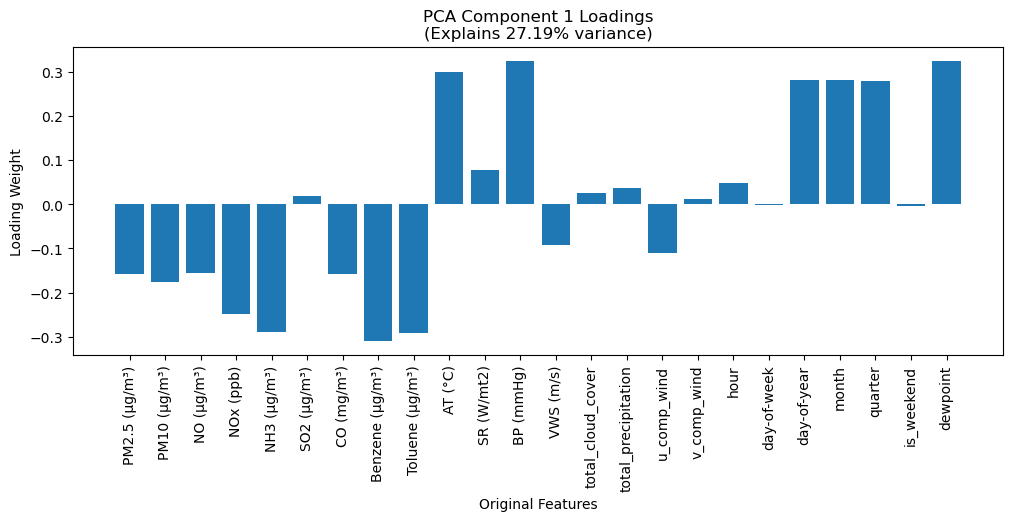

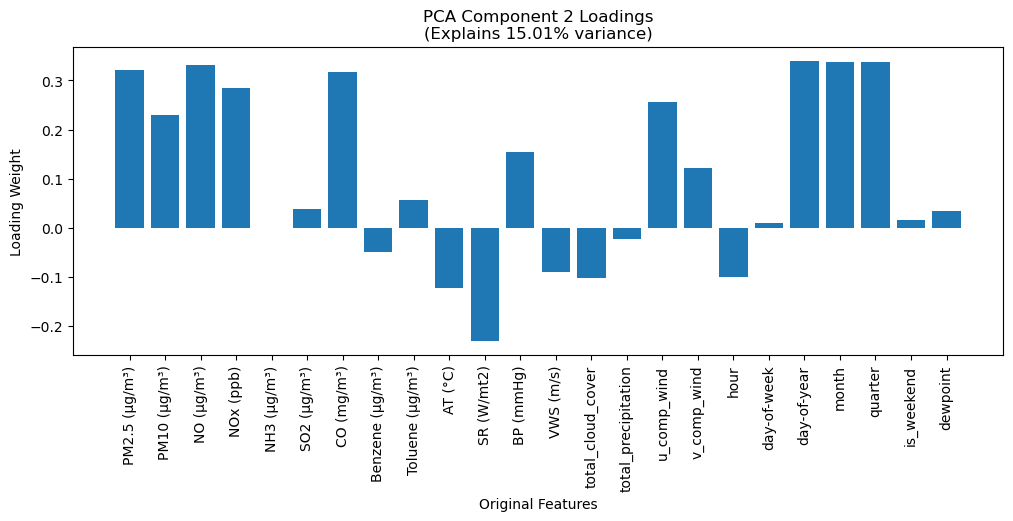

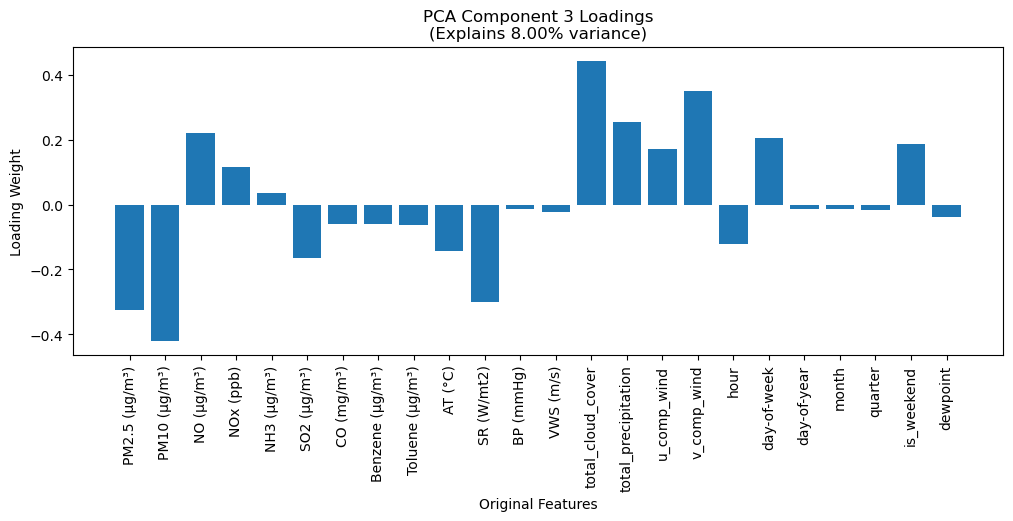

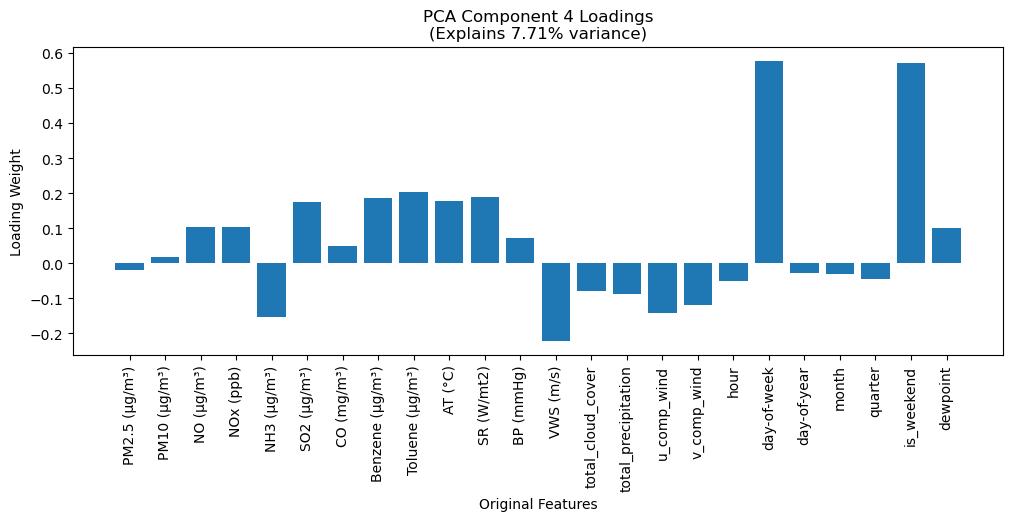

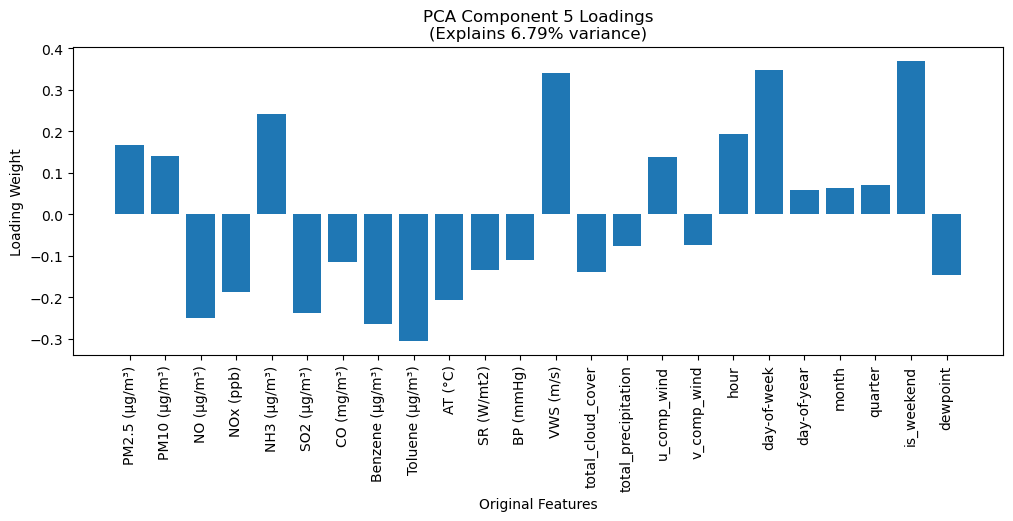

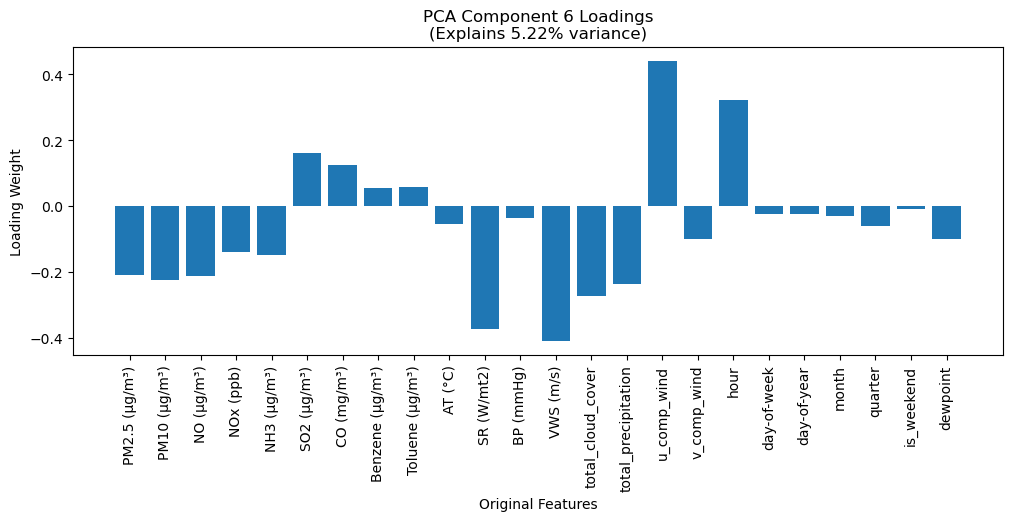

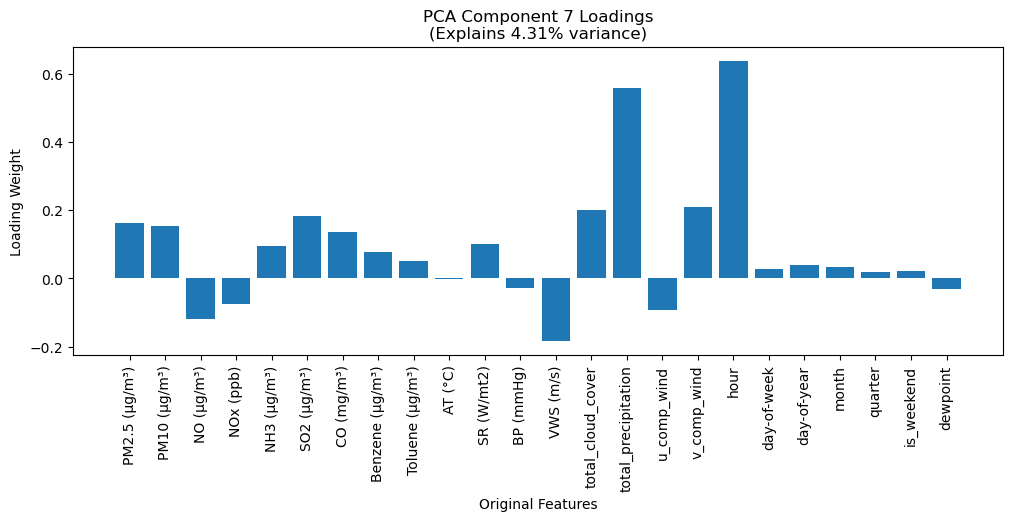

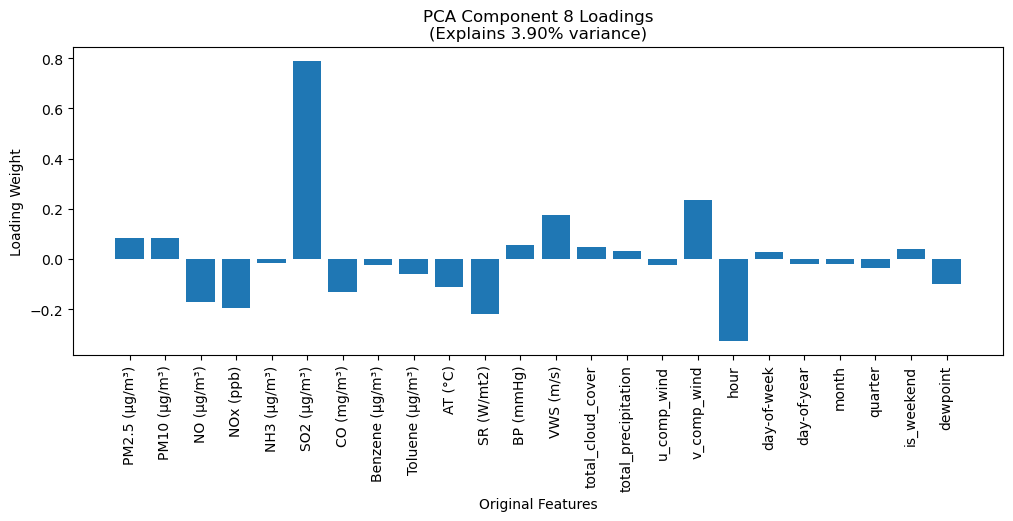

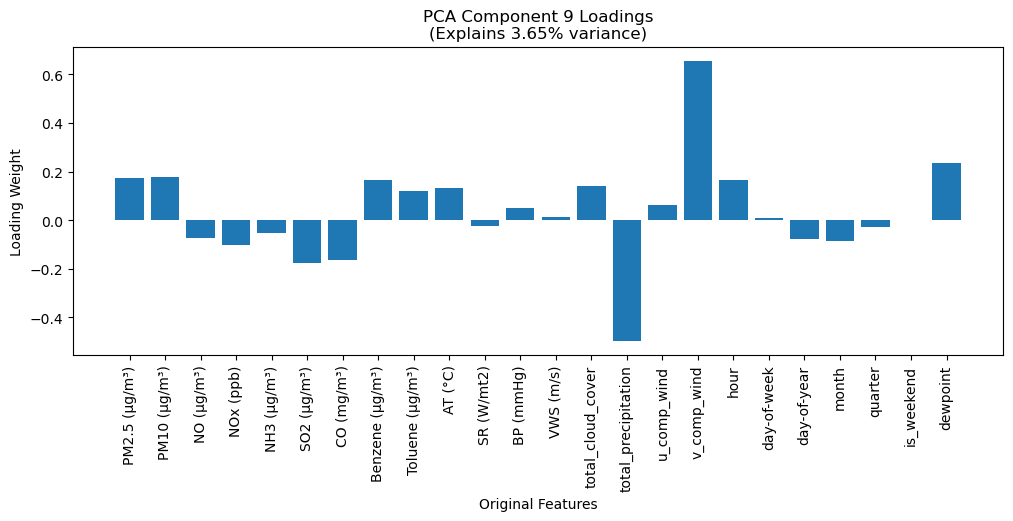

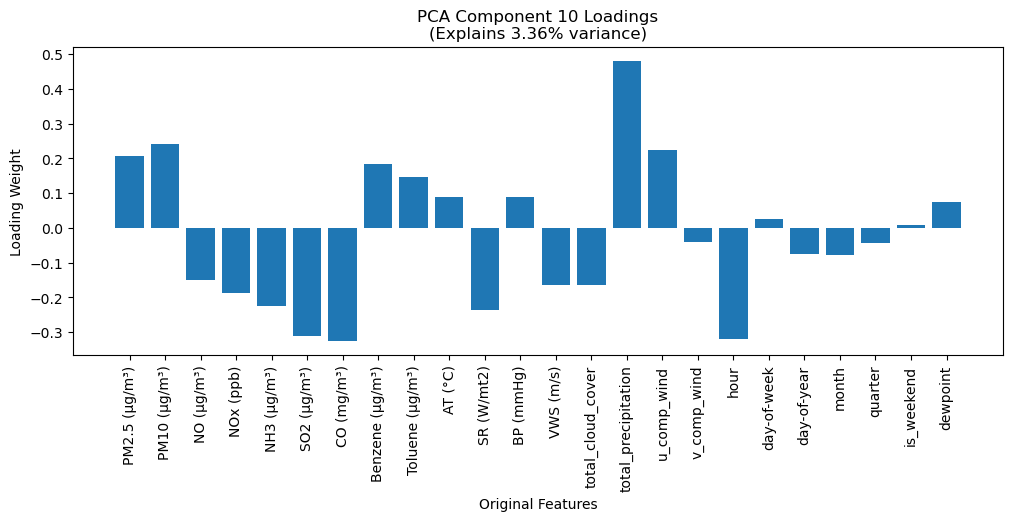

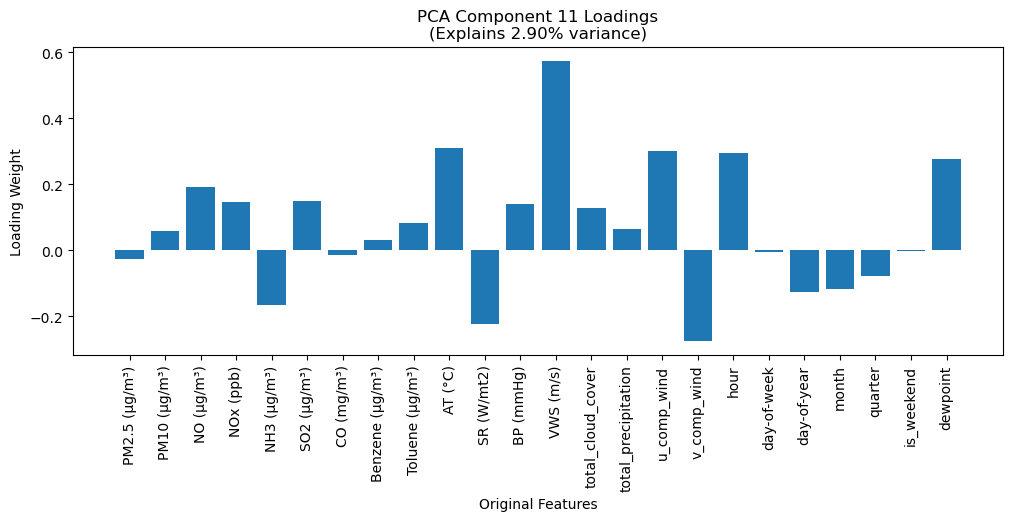

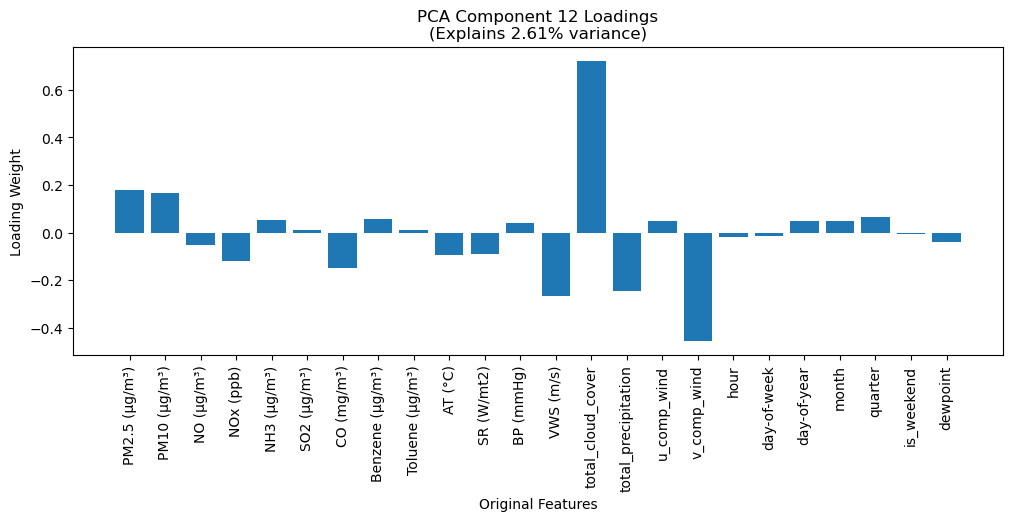

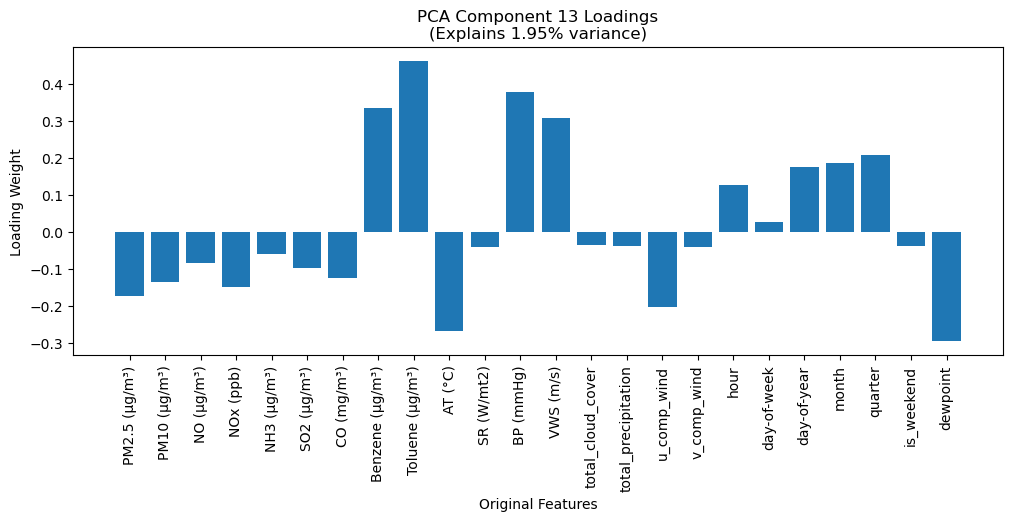

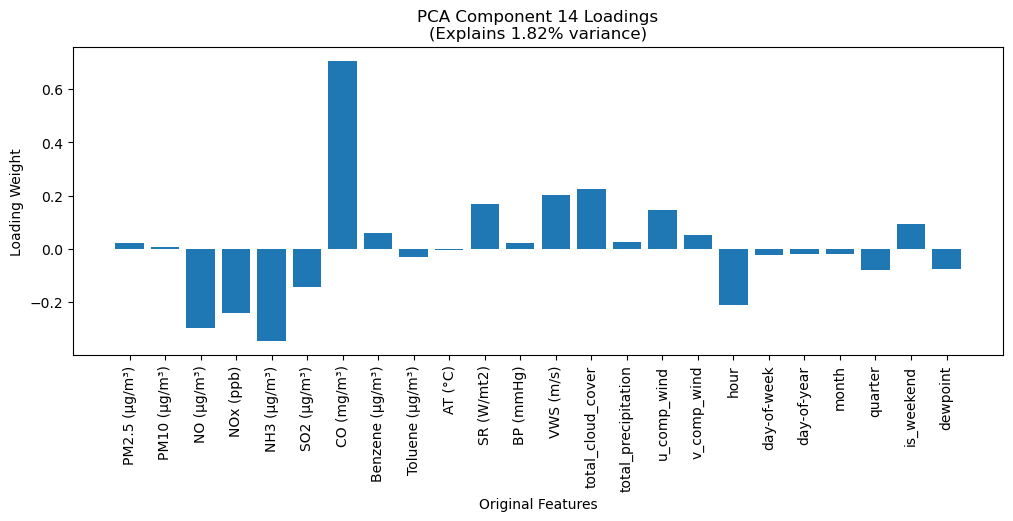

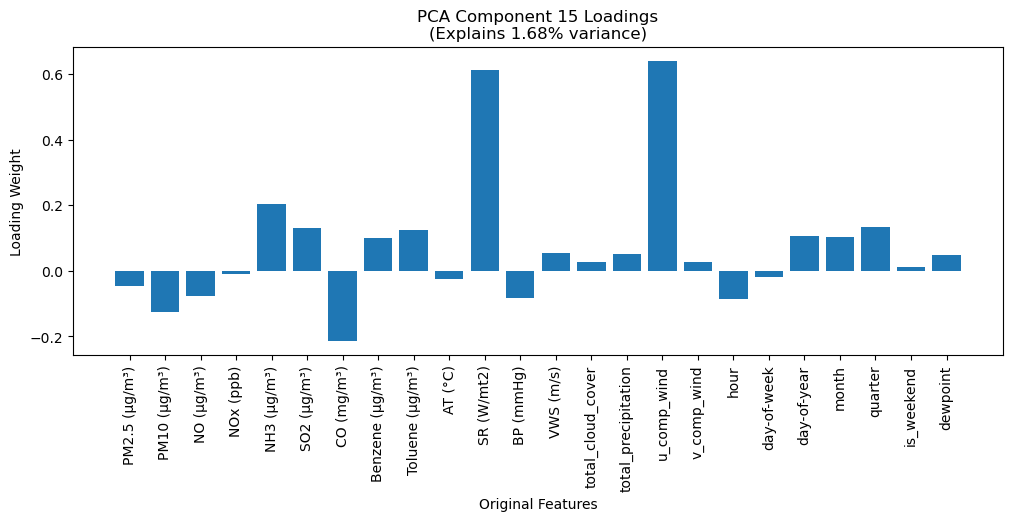

In [36]:
import matplotlib.pyplot as plt

feature_names = feature_cols

# Plot loadings for each principal component
for i, comp in enumerate(pca.components_):
    plt.figure(figsize=(12,4))
    plt.bar(feature_names, comp)
    plt.title(f"PCA Component {i+1} Loadings\n(Explains {pca.explained_variance_ratio_[i]*100:.2f}% variance)")
    plt.xlabel("Original Features")
    plt.ylabel("Loading Weight")
    plt.xticks(rotation=90)
    plt.show()

In [41]:
import pandas as pd
import numpy as np


labels = imputed_station_data[["Ozone (µg/m³)", "NO2 (µg/m³)"]].values

def create_sequences(features, labels, seq_len):
    X, y = [], []
    for i in range(len(features) - seq_len):
        seq_x = features[i:i+seq_len]  # 5 hours of features
        seq_y = labels[i+seq_len]      # label = next day's O3, NO2
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X, y = create_sequences(X_reduced, labels, seq_len=12)

print("X shape:", X.shape)  # (N, 7, num_features)
print("y shape:", y.shape)  # (N, 2)

np.save('./station_data_features.npy',X)
np.save('./data_labels.npy',y)


X shape: (8772, 12, 15)
y shape: (8772, 2)
